In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import glob
import cv2
import os
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

Using TensorFlow backend.


In [2]:
path = r"C:\Users\SANCHIT\Documents\archive\UTKFace"
files = os.listdir(path)
size = len(files)
print(files[3])
#Format of the files: age_gender_datetime
print("Total samples:",size)

100_1_0_20170112213001988.jpg.chip.jpg
Total samples: 23708


In [3]:
images = []
ages = []
genders = []
for file in files:
    p=os.path.join(path,file)
    image = cv2.imread(p,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )

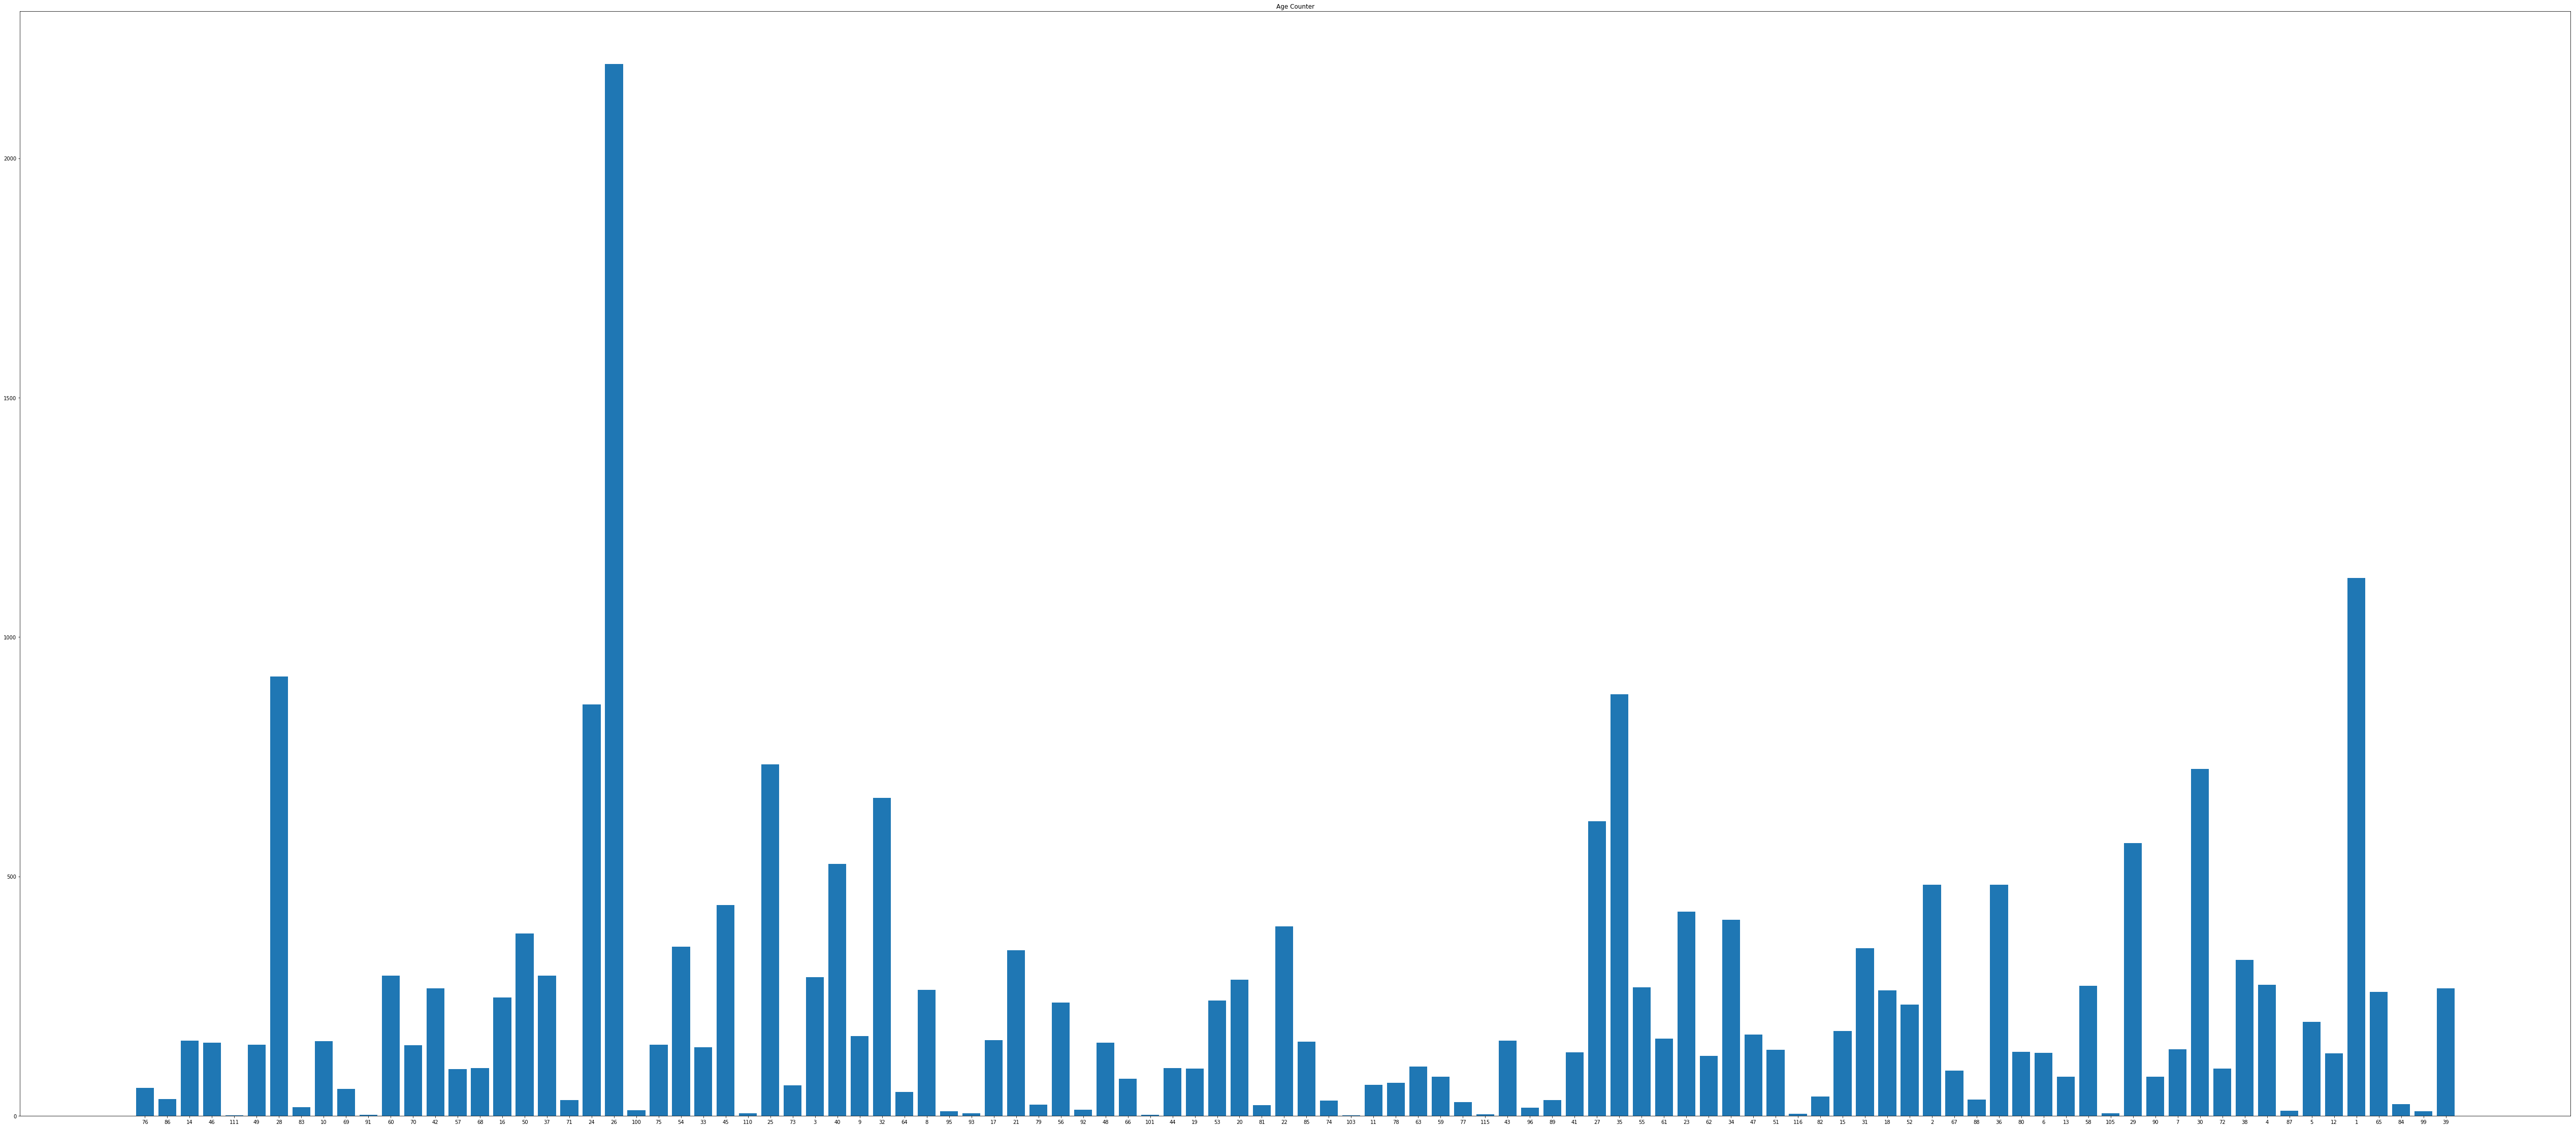

Max value: 99
Min value: 1


In [4]:
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.figure(figsize=(90, 40))
plt.bar(x_ages,y_ages)
plt.title("Age Counter") 
plt.show()
print("Max value:",max(ages))
print("Min value:",min(ages))

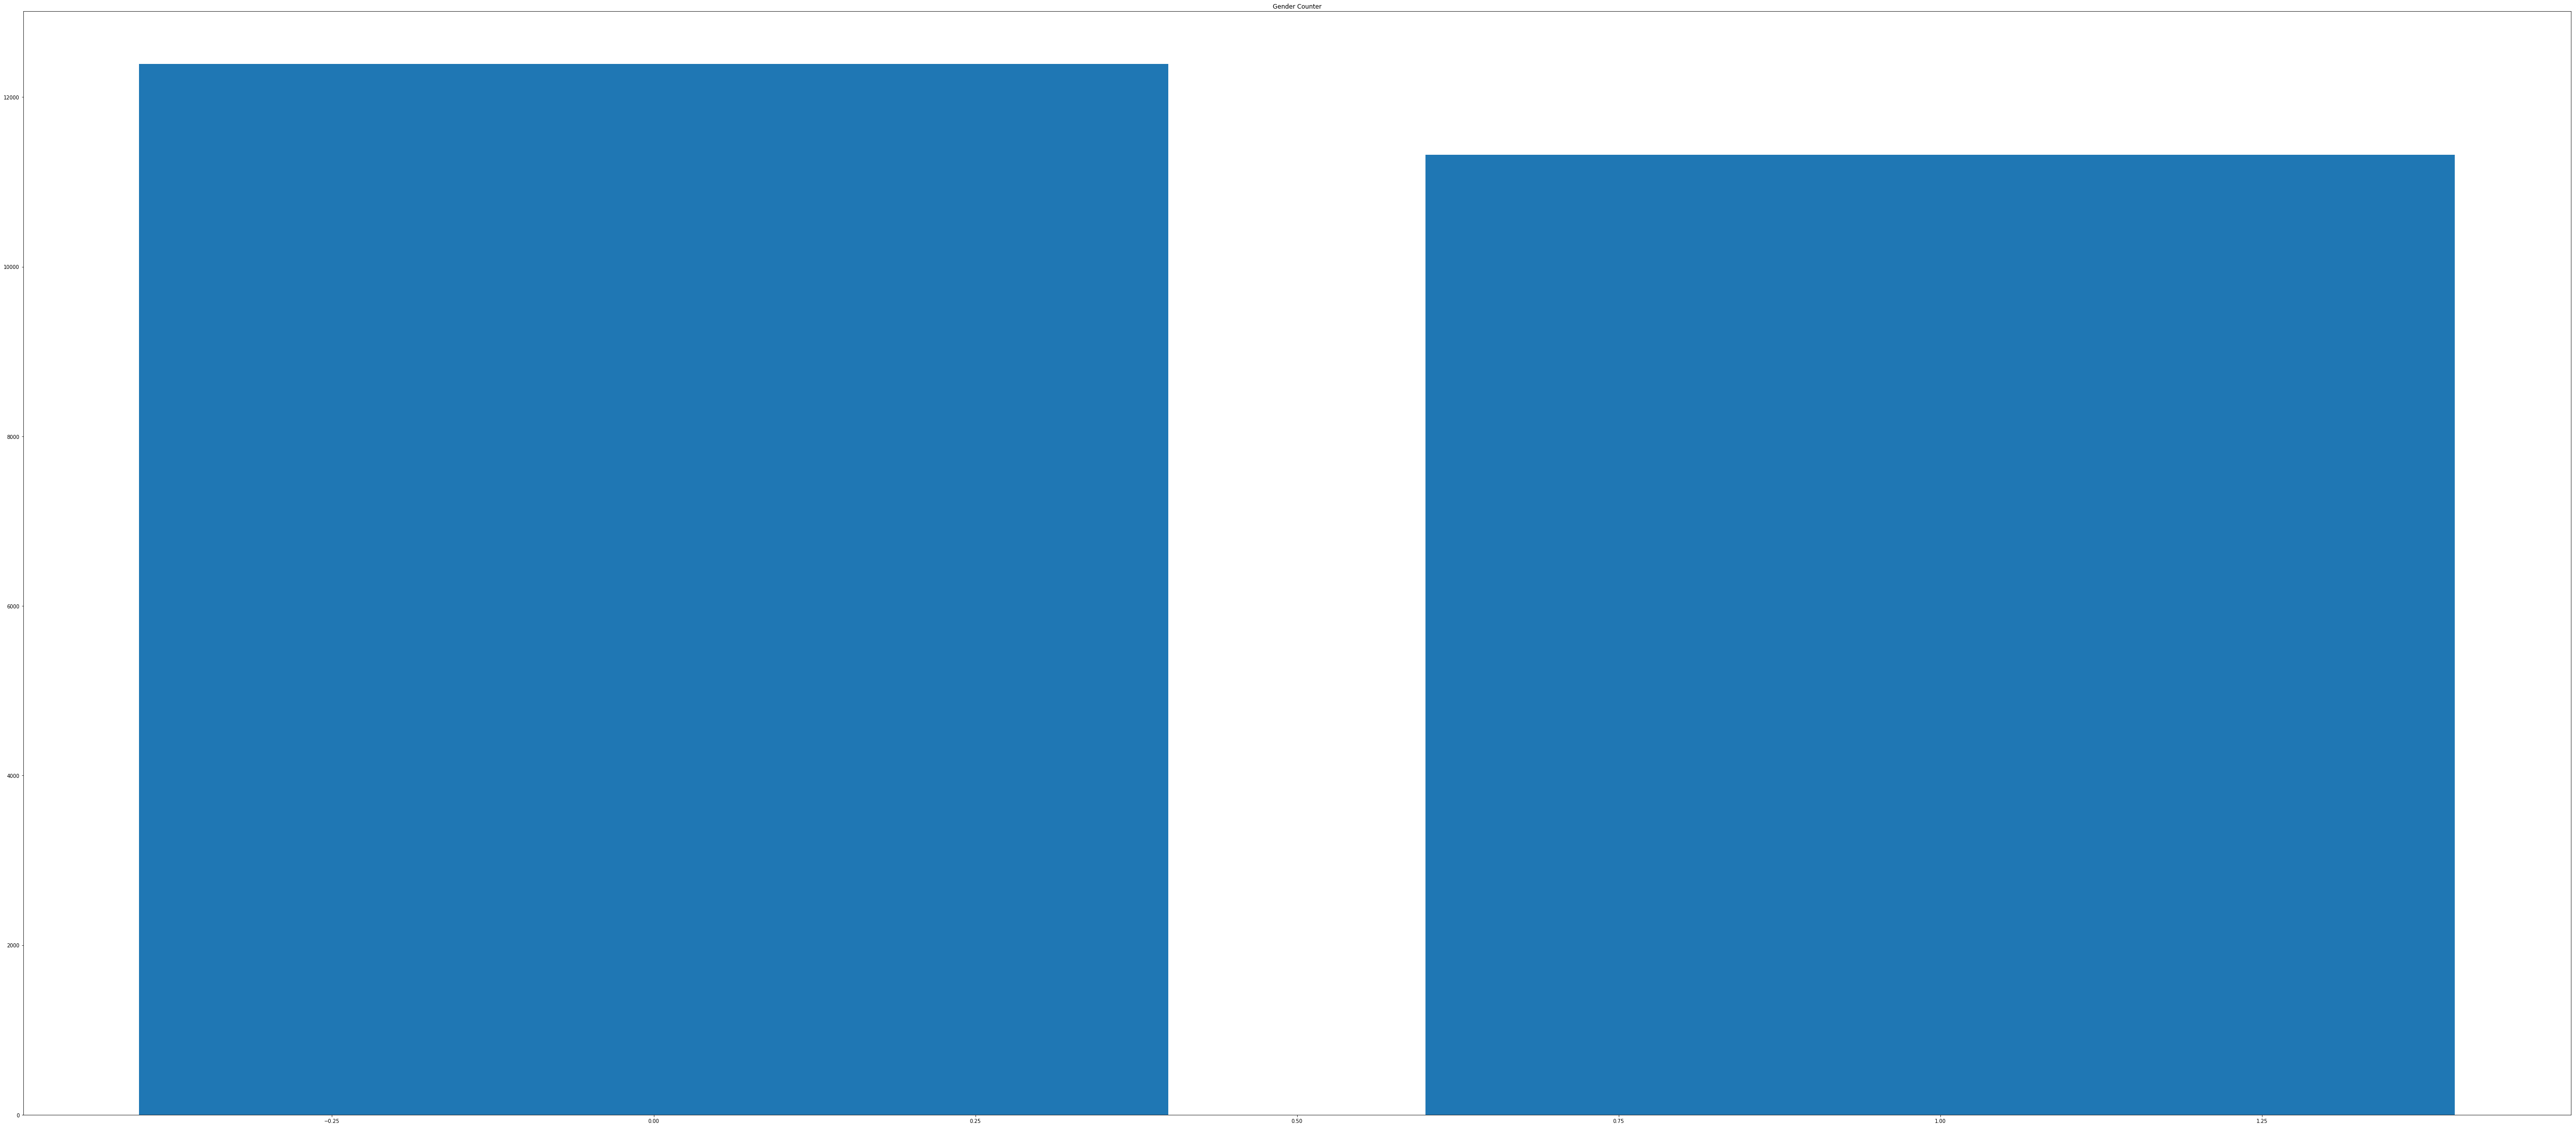

In [5]:
x_genders = list(set(genders))
y_genders = [genders.count(i) for i in x_genders]
plt.figure(figsize=(90, 40))
plt.bar(x_genders,y_genders)
plt.title("Gender Counter") 
plt.show()

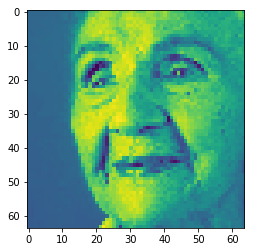

Gender: Female & Age: 100


In [6]:
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4 #unknown
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"
    
def display(img):
    plt.imshow(img[:,:,0])
    plt.show()
    
idx = 3
sample = images[idx]
display(sample)
print("Gender:",get_gender(genders[idx]),"& Age:",ages[idx])

In [7]:
import numpy as np
import pandas as pd
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 4
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
print("Shape of the images:",sample.shape)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle = True)
print("Training images numbers:",x_train.shape[0])
print("Testing images numbers:",x_test.shape[0])

Shape of the images: (64, 64, 1)
Training images numbers: 18966
Testing images numbers: 4742


In [8]:
size=len(x_train)
size

18966

In [9]:
inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(1, activation='sigmoid')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy',tf.keras.metrics.AUC()])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 60, 60, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1

In [10]:
s=len(x_train)
s

18966

In [11]:
h = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data=(x_test,[y_test[:,0],y_test[:,1]]),
              epochs = 30, batch_size=128, shuffle = True)


Train on 18966 samples, validate on 4742 samples
Epoch 1/30
18966/18966 [==============================] - 183s 10ms/step - loss: 0.5039 - dense_2_loss: 0.0326 - dense_4_loss: 0.4715 - dense_2_accuracy: 0.0265 - dense_2_auc: 0.8132 - dense_4_accuracy: 0.7632 - dense_4_auc: 0.8100 - val_loss: 0.3495 - val_dense_2_loss: 0.0219 - val_dense_4_loss: 0.3235 - val_dense_2_accuracy: 0.0280 - val_dense_2_auc: 0.8559 - val_dense_4_accuracy: 0.8553 - val_dense_4_auc: 0.8561
Epoch 2/30
18966/18966 [==============================] - 186s 10ms/step - loss: 0.3476 - dense_2_loss: 0.0227 - dense_4_loss: 0.3255 - dense_2_accuracy: 0.0281 - dense_2_auc: 0.8704 - dense_4_accuracy: 0.8544 - dense_4_auc: 0.8705 - val_loss: 0.3021 - val_dense_2_loss: 0.0178 - val_dense_4_loss: 0.2813 - val_dense_2_accuracy: 0.0289 - val_dense_2_auc: 0.8811 - val_dense_4_accuracy: 0.8840 - val_dense_4_auc: 0.8812
Epoch 3/30
18966/18966 [==============================] - 189s 10ms/step - loss: 0.3124 - dense_2_loss: 0.0210 -

Epoch 20/30
18966/18966 [==============================] - 204s 11ms/step - loss: 0.1058 - dense_2_loss: 0.0129 - dense_4_loss: 0.0925 - dense_2_accuracy: 0.0283 - dense_2_auc: 0.9437 - dense_4_accuracy: 0.9624 - dense_4_auc: 0.9437 - val_loss: 0.3058 - val_dense_2_loss: 0.0133 - val_dense_4_loss: 0.2903 - val_dense_2_accuracy: 0.0289 - val_dense_2_auc: 0.9443 - val_dense_4_accuracy: 0.9140 - val_dense_4_auc: 0.9443
Epoch 21/30
18966/18966 [==============================] - 203s 11ms/step - loss: 0.0998 - dense_2_loss: 0.0123 - dense_4_loss: 0.0872 - dense_2_accuracy: 0.0283 - dense_2_auc: 0.9449 - dense_4_accuracy: 0.9635 - dense_4_auc: 0.9450 - val_loss: 0.2978 - val_dense_2_loss: 0.0126 - val_dense_4_loss: 0.2839 - val_dense_2_accuracy: 0.0289 - val_dense_2_auc: 0.9455 - val_dense_4_accuracy: 0.9123 - val_dense_4_auc: 0.9455
Epoch 22/30
18966/18966 [==============================] - 187s 10ms/step - loss: 0.1011 - dense_2_loss: 0.0122 - dense_4_loss: 0.0885 - dense_2_accuracy: 0.028

dict_keys(['val_loss', 'val_dense_2_loss', 'val_dense_4_loss', 'val_dense_2_accuracy', 'val_dense_2_auc', 'val_dense_4_accuracy', 'val_dense_4_auc', 'loss', 'dense_2_loss', 'dense_4_loss', 'dense_2_accuracy', 'dense_2_auc', 'dense_4_accuracy', 'dense_4_auc'])


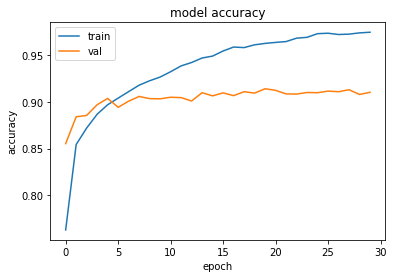

val accuracy: 90.37%


In [12]:
model.save('data.h5')
history = h
print(history.history.keys())

plt.plot(history.history['dense_4_accuracy'])
plt.plot(history.history['val_dense_4_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

val_acc = np.mean(history.history['val_dense_4_accuracy'])
print("%s: %.2f%%" % ('val accuracy',(val_acc*100)))

In [13]:
val_auc = np.mean(history.history['val_dense_4_auc'])
print("%s: %.2f" % ('val auc',(val_auc)))

val auc: 0.93


In [14]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.show()
    
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4 #unknown

def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-80"
    if distr >= 3.65 and distr <= 4.4:return "80 +"
    return "Unknown"
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

In [15]:
def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )    
    age = get_age(val[0])
    gender = get_gender(val[1])
    print("Predicted Gender:",gender,"Predicted Age:",age)

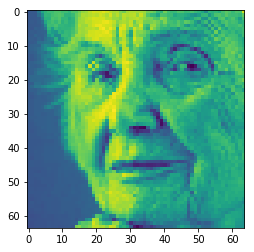

Actual Gender: Female Age: 100
Predicted Gender: Female Predicted Age: 80 +


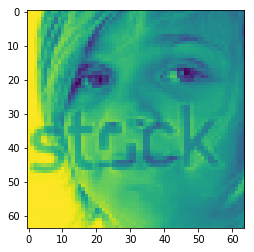

Actual Gender: Male Age: 10
Predicted Gender: Male Predicted Age: 0-18


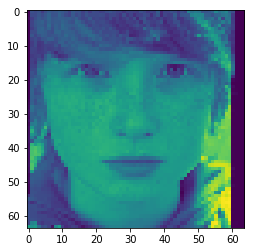

Actual Gender: Male Age: 15
Predicted Gender: Male Predicted Age: 0-18


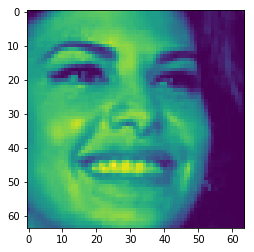

Actual Gender: Female Age: 26
Predicted Gender: Female Predicted Age: 19-30


In [16]:
indexes = [4,55,666,7777]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)

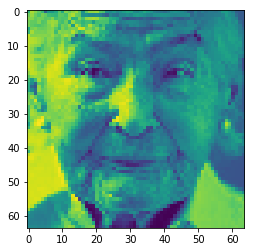

Actual Gender: Female Age: 100
Predicted Gender: Female Predicted Age: 80 +


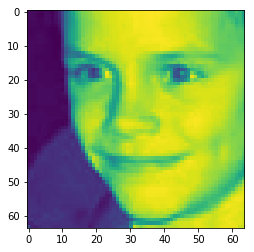

Actual Gender: Male Age: 10
Predicted Gender: Male Predicted Age: 0-18


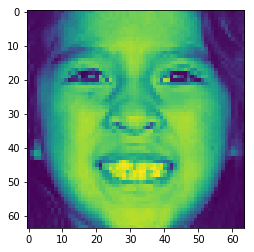

Actual Gender: Female Age: 14
Predicted Gender: Female Predicted Age: 0-18


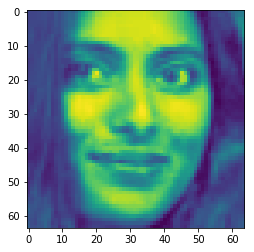

Actual Gender: Female Age: 29
Predicted Gender: Female Predicted Age: 19-30


In [17]:
indexes = [9,52,600,9999]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)

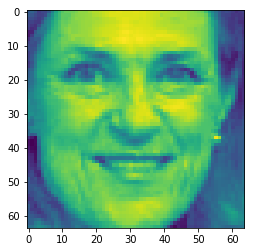

Actual Gender: Female Age: 32
Predicted Gender: Female Predicted Age: 31-80


In [18]:
indexes = [12000]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)